# The idea

I wanted to see if I could find data associated with embedded protostars in Perseus.

[Tobin et al. (2016)](https://ui.adsabs.harvard.edu/abs/2016ApJ...818...73T/abstract) is a paper on embedded protostars, and claims to have a catalog "all known protostars (94) in the Perseus molecular cloud".

I was able to pull out ~28 lightcurves. Essentially all of them are highly variable.

In [91]:
# first: map just our variability coverage of wserv7+8.

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import astropy.table
from astropy.coordinates import SkyCoord, Angle
from astropy import units as u

from wuvars.data import spreadsheet, photometry, quality_classes

fig_path = "/Users/tsrice/Documents/Variability_Project_2020/wuvars/analysis/prototypes/Perseus_protostar_lcs/"

In [6]:
loc = "/Users/tsrice/Documents/Variability_Project_2020/wuvars/data/auxiliary_catalogs/c2d_Perseus/Tobin2016_Table1_ApJ_818_73_table1.fits"

tab = astropy.table.Table.read(loc, format='fits')

In [74]:
ngc_spread = spreadsheet.load_wserv_v2(7)
ngc_q = quality_classes.load_q(7)
ngc_dat = photometry.group_wserv_v2(photometry.load_wserv_v2(7))

ic_spread = spreadsheet.load_wserv_v2(8)
ic_q = quality_classes.load_q(8)
ic_dat = photometry.group_wserv_v2(photometry.load_wserv_v2(8))


Loading WSERV7 photometry data... DONE (elapsed time: 0.22s)
Loading WSERV8 photometry data... DONE (elapsed time: 0.16s)


Text(0.5, 1.0, 'VANDAM Protostars in Perseus: comparing our UKIRT-monitored regions')

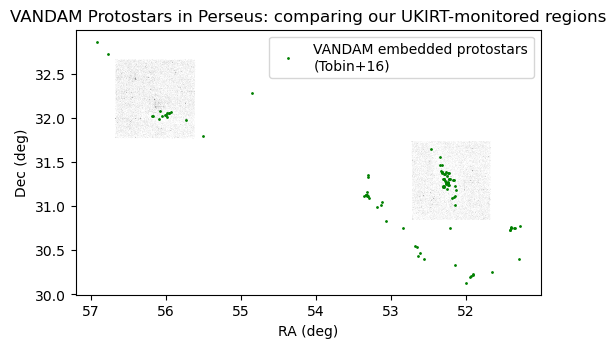

In [89]:
fig, ax = plt.subplots(1, dpi=100)

plt.plot(np.degrees(ngc_spread['median']['RA']), np.degrees(ngc_spread['median']['DEC']), 'k,', alpha=0.01)
plt.plot(np.degrees(ic_spread['median']['RA']), np.degrees(ic_spread['median']['DEC']), 'k,', alpha=0.01)

plt.plot(tab['RAJ2000'], tab['DEJ2000'], 'g.', ms=2, label='VANDAM embedded protostars\n(Tobin+16)')

ax.set_aspect(1/np.cos(np.radians(31.8)))
ax.invert_xaxis()
ax.set_xlabel("RA (deg)")
ax.set_ylabel("Dec (deg)")

plt.legend()

ax.set_title("VANDAM Protostars in Perseus: comparing our UKIRT-monitored regions")

In [15]:
tobin_coords = SkyCoord(tab['RAJ2000'], tab['DEJ2000'], unit=('deg', 'deg'))
tobin_coords

<SkyCoord (ICRS): (ra, dec) in deg
    [(55.98669167, 32.013945  ), (53.0747    , 30.82995139),
     (52.25239583, 31.20005667), (52.16292083, 31.1005    ),
     (52.83724583, 30.75840917), (53.31001667, 31.11964306),
     (52.63617083, 30.44068889), (56.18325833, 32.02644722),
     (52.46596667, 31.65164028), (53.31843333, 31.11446194),
     (55.98777083, 32.05133   ), (52.29390417, 31.22525917),
     (52.30006667, 31.2188975 ), (52.30645   , 31.23281944),
     (52.26689583, 31.24617694), (55.96240833, 32.05669472),
     (51.9129375 , 30.21751889), (52.29690833, 31.30863139),
     (52.34790833, 31.55810361), (51.93031667, 30.20799472),
     (52.29445   , 31.30560861), (51.34337083, 30.75368278),
     (52.3217125 , 31.46286167), (52.1887375 , 31.09491472),
     (51.65629583, 30.25772583), (51.41197917, 30.73480083),
     (52.2315375 , 31.24361806), (55.96253333, 32.05223389),
     (53.3244875 , 31.15883806), (53.3637625 , 31.11948889),
     (52.1356125 , 31.18476417), (56.0100125 , 32.

In [17]:
# Clue: can we concatenate the two spreads?

ngc_sm = ngc_spread["median"]
ngc_spreadsheet_coordinates = SkyCoord(
    ra=ngc_sm["RA"].values * u.rad, dec=ngc_sm["DEC"].values * u.rad
)

ic_sm = ic_spread["median"]
ic_spreadsheet_coordinates = SkyCoord(
    ra=ic_sm["RA"].values * u.rad, dec=ic_sm["DEC"].values * u.rad
)

# idx, d2d, d3d = jenny_coords.match_to_catalog_sky(spreadsheet_coordinates)


In [55]:
per_sm = pd.concat([ngc_sm, ic_sm])
per_spreadsheet_coordinates = SkyCoord(
    ra=per_sm["RA"].values * u.rad, dec=per_sm["DEC"].values * u.rad
)

In [56]:
ic_sm.shape, ngc_sm.shape, per_sm.shape

((27769, 21), (21885, 21), (49654, 21))

In [57]:
idx, d2d, d3d = tobin_coords.match_to_catalog_sky(per_spreadsheet_coordinates)


(array([0., 4., 0., 9., 6., 6., 1., 0., 2., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 1., 1.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

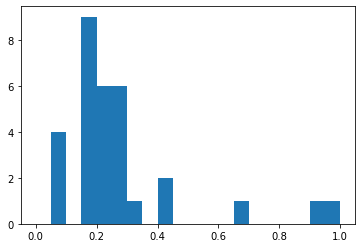

In [87]:
plt.subplots(1)
# plt.hist(d2d.to(u.arcsec).value, bins=50, range=(0,1), label='All NGC 1333 members')
plt.hist(d2d.to(u.arcsec).value, range=(0, 1), bins=20)

(array([31.,  3.,  2.,  2.,  1.,  2.,  1.,  4.,  2.,  0.,  0.,  3.,  1.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20.]),
 <BarContainer object of 20 artists>)

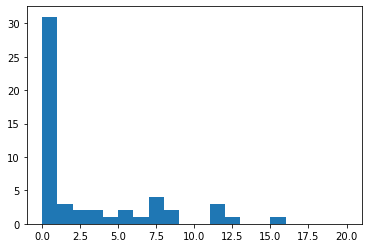

In [90]:
plt.subplots(1)
# plt.hist(d2d.to(u.arcsec).value, bins=50, range=(0,1), label='All NGC 1333 members')
plt.hist(d2d.to(u.arcsec).value, range=(0, 20), bins=20)

In [60]:
max_sep = 0.5 * u.arcsec
sep_constraint = d2d < max_sep

# We're going to compute
# (a) all matched IC348 members, for quality control / comparisons, and
# (b) just the brown dwarfs

matches = per_sm.iloc[idx[sep_constraint]]
matched = tab[sep_constraint]

In [61]:
matches

,MEANMJDOBS,RA,DEC,JMHPNT,JMHPNTERR,HMKPNT,HMKPNTERR,JAPERMAG3,JAPERMAG3ERR,HAPERMAG3,...,KAPERMAG3,KAPERMAG3ERR,JPPERRBITS,HPPERRBITS,KPPERRBITS,MERGEDCLASS,PSTAR,JGRADE,HGRADE,KGRADE
SOURCEID,,,,,,,,,,,,,,,,,,,,,
44508746109461,56318.268970,0.912231,0.545349,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,17.629936,0.105737,NaN,NaN,0.0,1.0,0.050000,0.941176,0.919014,0.927203
44508746101372,56222.350060,0.910864,0.542709,NaN,NaN,1.913210,0.065190,NaN,NaN,17.656841,...,15.659595,0.019879,NaN,0.0,0.0,1.0,0.003067,0.984568,0.978448,0.980114
44989782469603,56999.323713,0.976732,0.559417,2.367134,0.058318,2.480784,0.032602,18.123940,0.061323,16.422173,...,14.220643,0.010623,0.0,0.0,0.0,1.0,0.003067,0.991111,0.984874,0.984848
44508746098705,56215.591053,0.910268,0.544984,2.427172,0.143472,2.276088,0.028481,18.682802,0.133662,16.232445,...,13.962389,0.009531,0.0,16.0,16.0,1.0,0.050000,0.993769,0.978541,0.985714
44508746107316,56243.985063,0.912208,0.545725,1.844253,0.021061,1.130868,0.021013,12.224252,0.008316,10.393026,...,9.244745,0.008211,0.0,0.0,16.0,-1.0,0.999657,0.972727,0.969971,0.972603
44508746136559,56243.570070,0.910080,0.541300,1.890632,0.023636,1.570638,0.021380,15.841434,0.012640,13.935937,...,12.351698,0.008417,0.0,0.0,0.0,1.0,0.000171,0.976589,0.976636,0.984756
44508746118754,56243.004717,0.912876,0.546358,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13.488064,0.008999,NaN,NaN,0.0,-1.0,0.900000,0.984791,0.972060,0.983845
44508746118971,56243.004717,0.912498,0.547439,NaN,NaN,NaN,NaN,NaN,NaN,14.033306,...,NaN,NaN,NaN,16.0,NaN,1.0,0.003067,0.984791,0.972060,0.983845
44508746128257,56243.003428,0.910458,0.546153,NaN,NaN,3.301627,0.038271,NaN,NaN,16.712687,...,13.412496,0.008960,NaN,0.0,0.0,-1.0,0.976744,0.976628,0.978723,0.984779


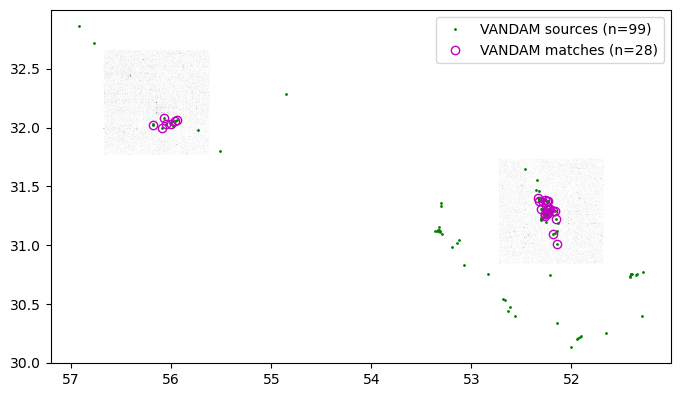

In [65]:
fig, ax = plt.subplots(1, figsize=(8,8), dpi=100)

plt.plot(np.degrees(per_sm['RA']), np.degrees(per_sm['DEC']), 'k,', alpha=0.01)
plt.plot(tab['RAJ2000'], tab['DEJ2000'], 'g.', ms=2, label=f'VANDAM sources (n={len(tab)})')
plt.plot(np.degrees(matches['RA']), np.degrees(matches['DEC']), 'mo', markerfacecolor='None', label=f'VANDAM matches (n={len(matches)})')

plt.gca().set_aspect(1/np.cos(np.radians(31.8)))
plt.gca().invert_xaxis()

plt.legend()


In [66]:
protostar_match_sids = matches.index

In [67]:
protostar_match_sids

Int64Index([44508746109461, 44508746101372, 44989782469603, 44508746098705,
            44508746107316, 44508746136559, 44508746118754, 44508746118971,
            44508746128257, 44508746116492, 44989782497216, 44508746116571,
            44508746116311, 44508746117347, 44989782467860, 44989782468569,
            44508746127123, 44508746116226, 44989782469783, 44989782468259,
            44989782469468, 44508746109403, 44508746116167, 44508746116084,
            44508746116301, 44508746108550, 44508746117258, 44508746107260],
           dtype='int64', name='SOURCEID')

In [77]:
matched['Source']

Per-emb-15
Per-emb-24
Per-emb-28
Per-emb-35
Per-emb-44
Per-emb-47
Per-emb-49
Per-emb-50
Per-emb-52
Per-emb-54
Per-emb-55


In [68]:
from wuvars.plotting.lightcurve import ngc1333_simple_lc_scatter_brokenaxes, ic348_simple_lc_scatter_brokenaxes


In [78]:
def q_string(sid, spread, qualityset):
    
    q = qualityset
    
    if sid in spread[q.q2].index:
        return "2"

    elif sid in spread[q.q1_j | q.q1_h | q.q1_k].index:
        return_string = "1"

        if sid in spread[q.q1_j].index:
            return_string += "J"
        if sid in spread[q.q1_h].index:
            return_string += "H"            
        if sid in spread[q.q1_k].index:
            return_string += "K"
            
        return return_string
            
    elif sid in spread[q.q0].index:
        return "0"
    
    else:
        return "-1"

0 44508746109461


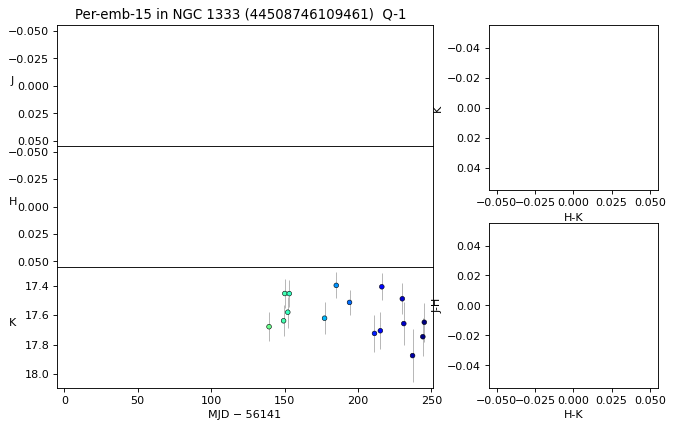

1 44508746101372


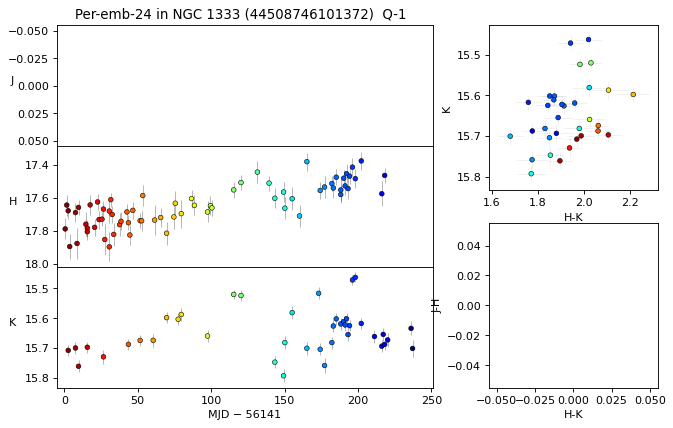

2 44989782469603


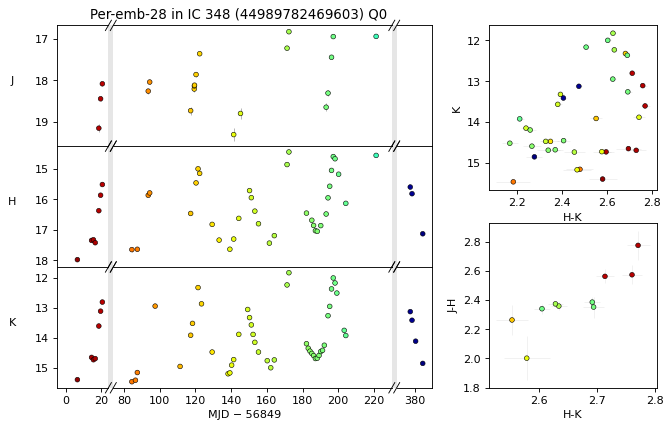

3 44508746098705


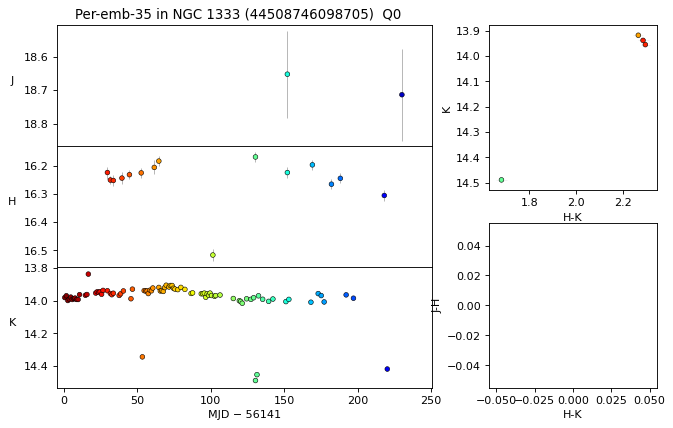

4 44508746107316


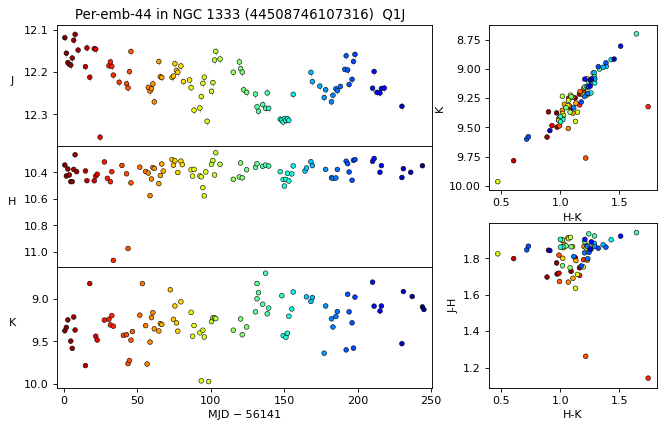

5 44508746136559


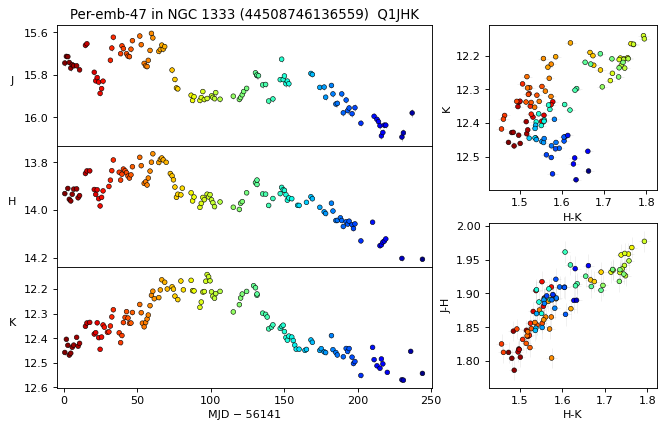

6 44508746118754


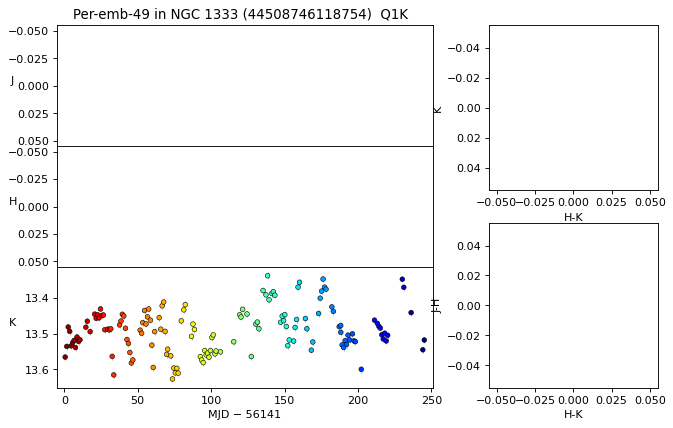

7 44508746118971


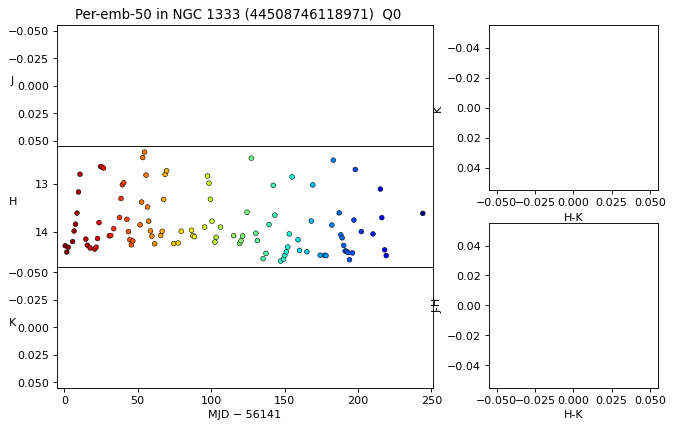

8 44508746128257


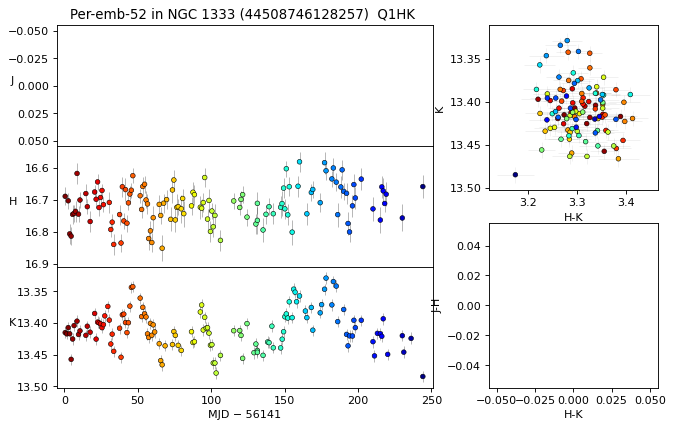

9 44508746116492


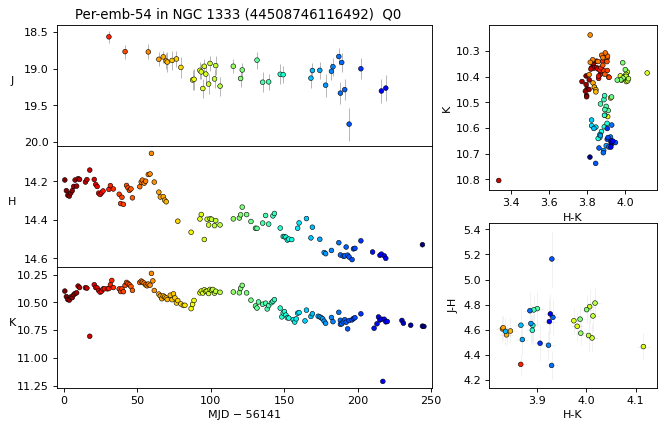

10 44989782497216


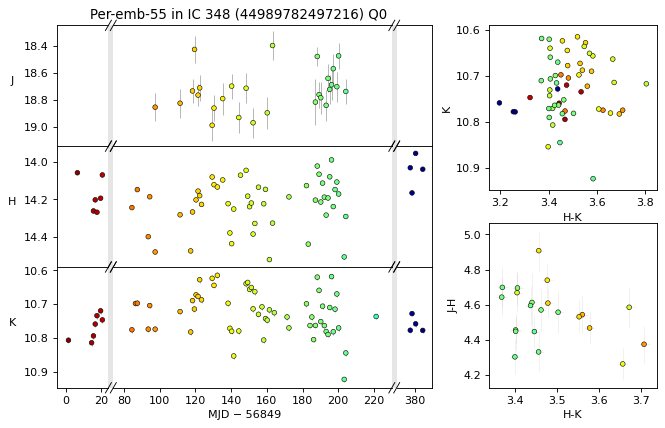

11 44508746116571


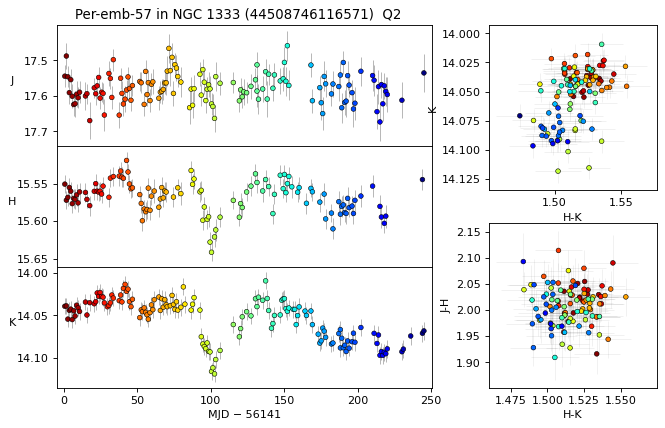

12 44508746116311


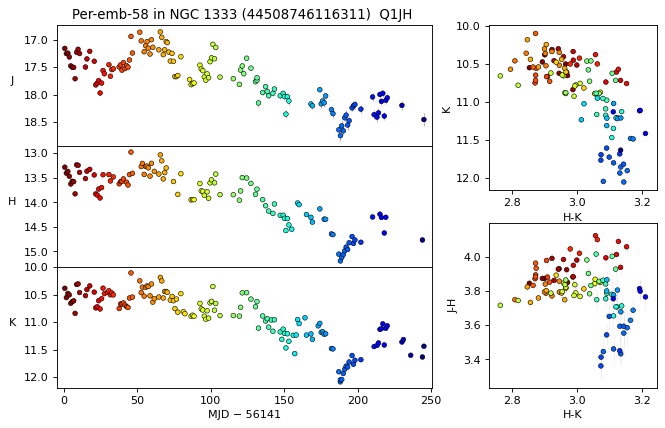

13 44508746117347


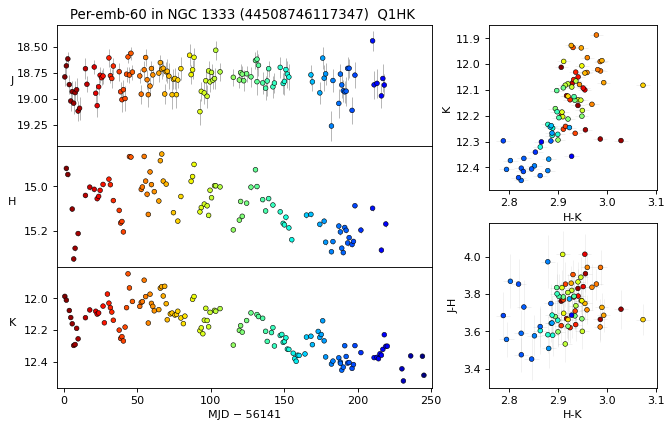

14 44989782467860


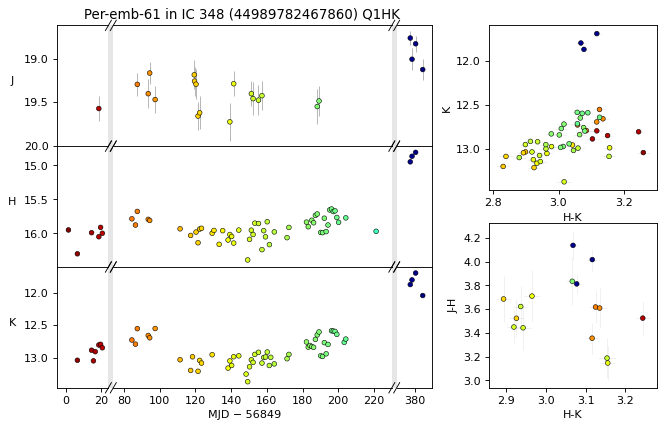

15 44989782468569


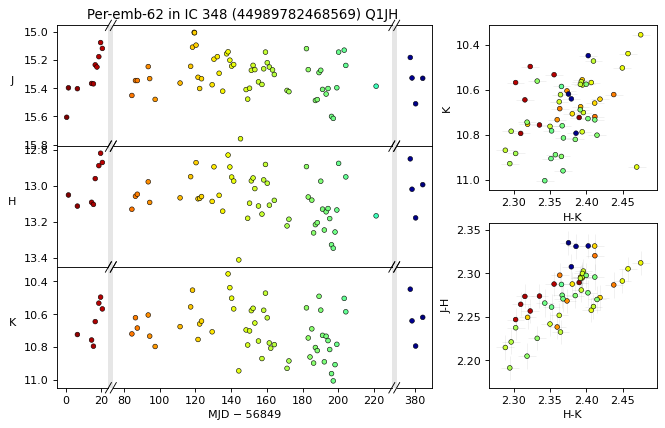

16 44508746127123


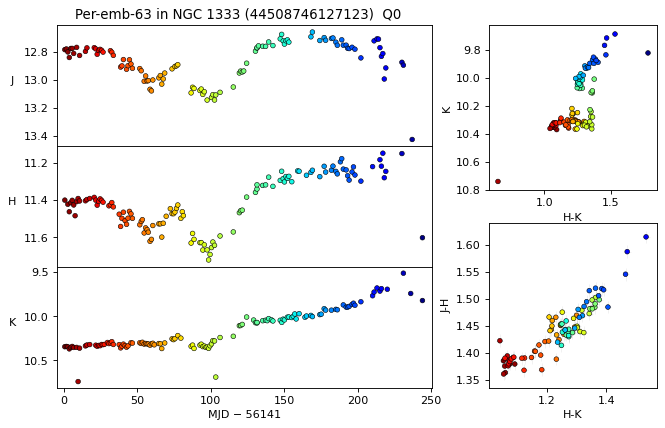

17 44508746116226


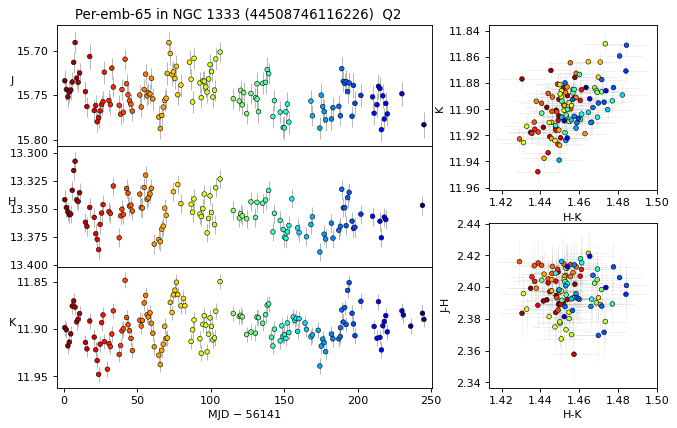

18 44989782469783


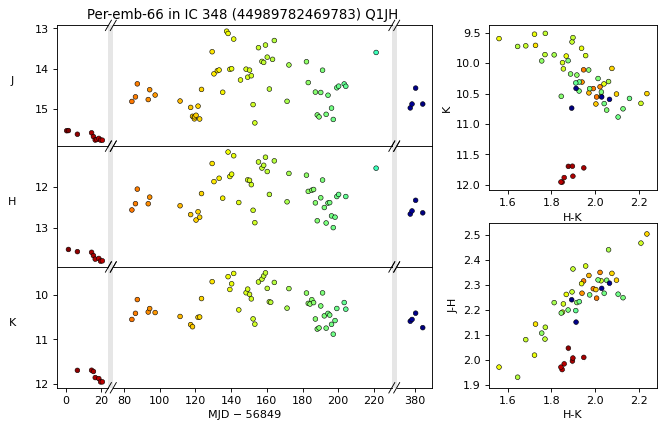

19 44989782468259


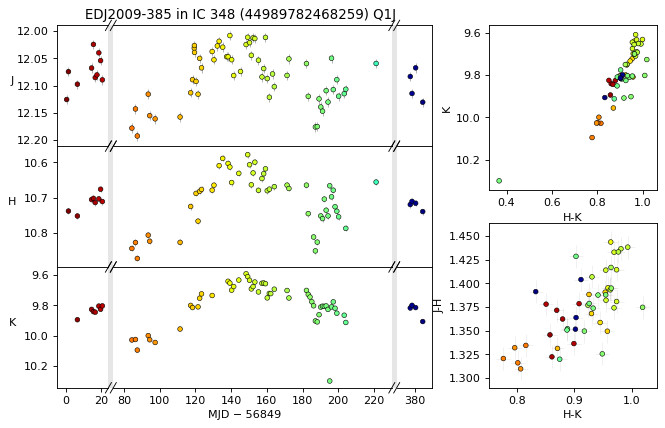

20 44989782469468


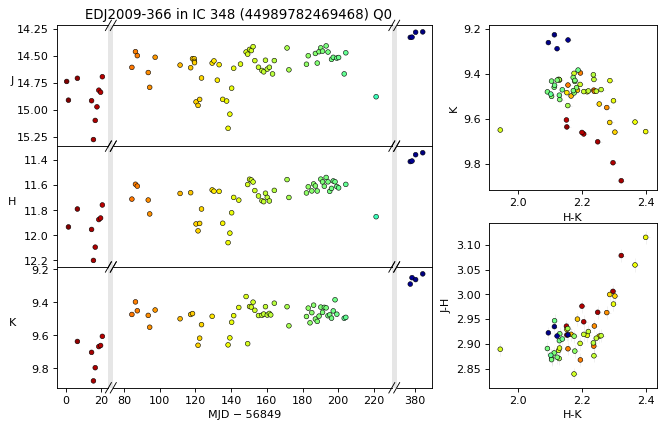

21 44508746109403


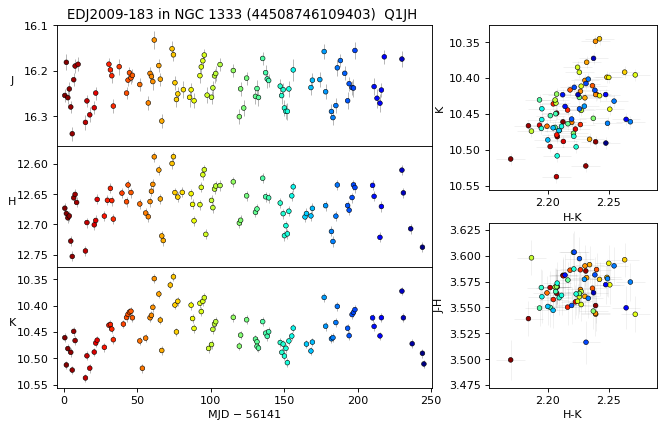

22 44508746116167


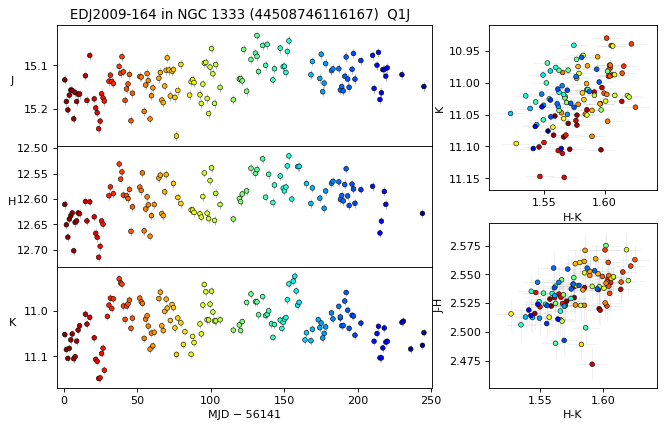

23 44508746116084


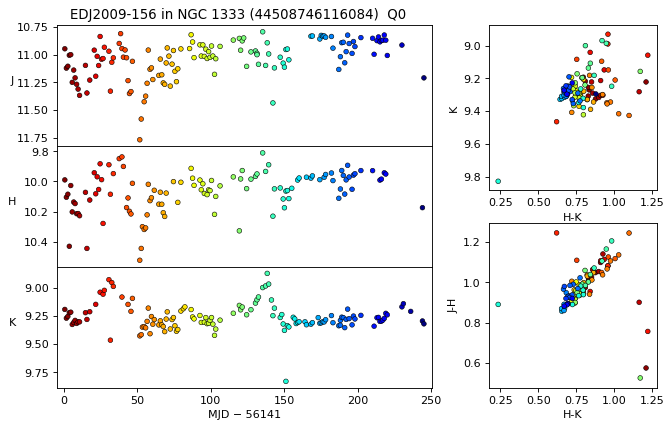

24 44508746116301


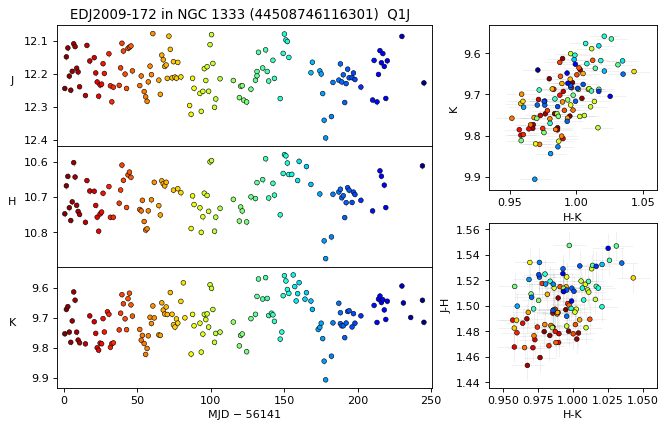

25 44508746108550


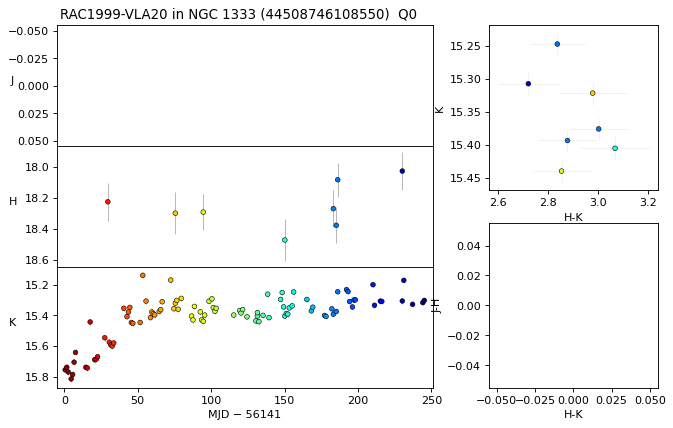

26 44508746117258


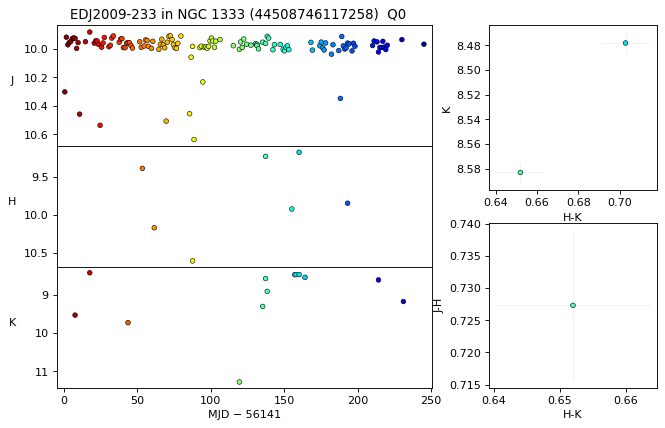

27 44508746107260


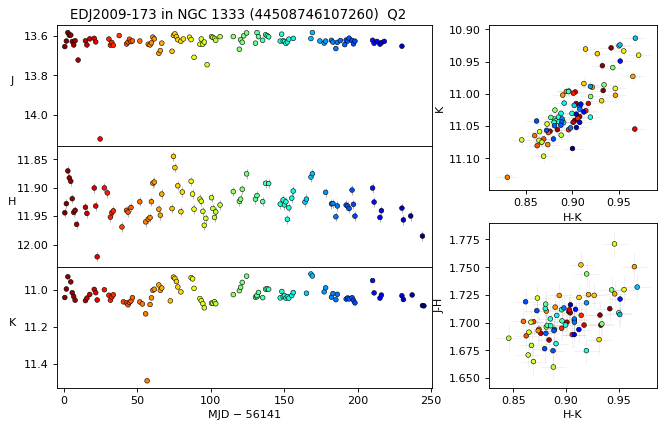

In [84]:
#     data_quality_text = f"Q{q_string(sid, spread, q):4s}  "


for i, sid in enumerate(protostar_match_sids):

    print(i, sid)
    if sid in ic_sm.index:
#         print("This one is in IC 348")
        fig_lc = ic348_simple_lc_scatter_brokenaxes(ic_dat, sid, cmap='jet_r')
        fig_lc.ax_j.set_title(f"{matched['Source'][i]} in IC 348 ({sid}) Q{q_string(sid, ic_spread, ic_q):4s}")
        
    elif sid in ngc_sm.index:
#         print("This one is in NGC 1333")
        fig_lc = ngc1333_simple_lc_scatter_brokenaxes(ngc_dat, sid, cmap='jet_r')
        fig_lc.ax_j.set_title(f"{matched['Source'][i]} in NGC 1333 ({sid})  Q{q_string(sid, ngc_spread, ngc_q):4s}")
    else:
        raise ValueError("OOPS")
    plt.savefig()
    plt.show()
    
    

Text(0.5, 1.0, 'Map zoom-in on IC 348')

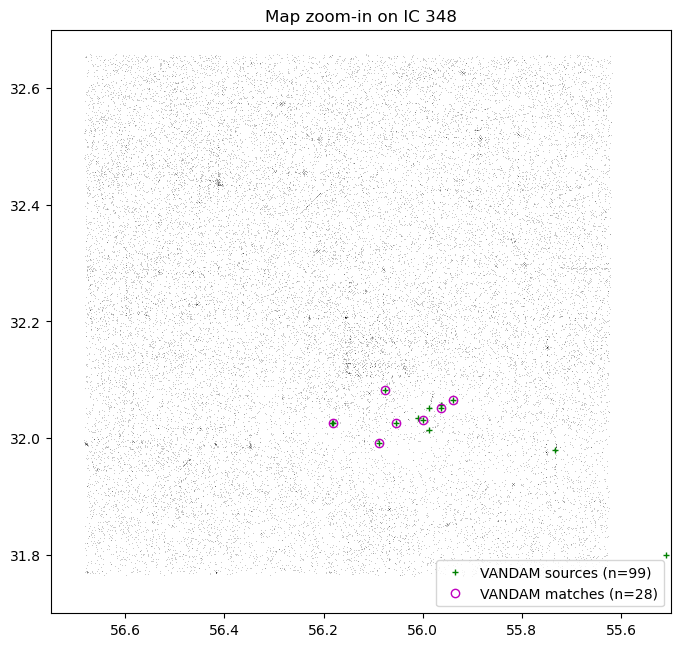

In [108]:
# zoomed in maps of each SFR

fig, ax = plt.subplots(1, figsize=(8,8), dpi=100)

plt.plot(np.degrees(per_sm['RA']), np.degrees(per_sm['DEC']), 'k,', alpha=0.2)
plt.plot(tab['RAJ2000'], tab['DEJ2000'], 'g+', ms=5, label=f'VANDAM sources (n={len(tab)})')
plt.plot(np.degrees(matches['RA']), np.degrees(matches['DEC']), 'mo', markerfacecolor='None', label=f'VANDAM matches (n={len(matches)})')

plt.gca().set_aspect(1/np.cos(np.radians(31.8)))
plt.gca().invert_xaxis()

plt.legend()

plt.xlim(56.75, 55.5)
plt.ylim(31.7, 32.7)

plt.title("Map zoom-in on IC 348")

Text(0.5, 1.0, 'Map zoom-in on NGC 1333')

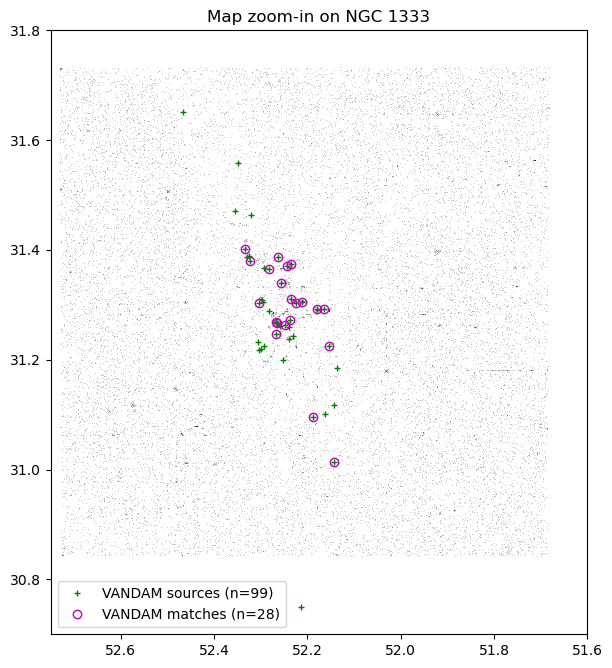

In [109]:
# zoomed in maps of each SFR

fig, ax = plt.subplots(1, figsize=(8,8), dpi=100)

plt.plot(np.degrees(per_sm['RA']), np.degrees(per_sm['DEC']), 'k,', alpha=0.2)
plt.plot(tab['RAJ2000'], tab['DEJ2000'], 'g+', ms=5, label=f'VANDAM sources (n={len(tab)})')
plt.plot(np.degrees(matches['RA']), np.degrees(matches['DEC']), 'mo', markerfacecolor='None', label=f'VANDAM matches (n={len(matches)})')

plt.gca().set_aspect(1/np.cos(np.radians(31.8)))
plt.gca().invert_xaxis()

plt.legend()

plt.xlim(52.75, 51.6)
plt.ylim(30.7, 31.8)

plt.title("Map zoom-in on NGC 1333")